# A1 - Complex Networks
### Authors: Ignacio Miguel Rodríguez and Daniel Arias Cámara

## Part 1. Structural characterization of networks

You can find four different networks labelled as net1, net2, net3 and net4 in the activityA1.zip
file.  To characterize their macroscopic structure, the students should analyze (at least) the following network descriptors:

* Number of nodes
* Number of edges
* Minimum, maximum, and average degree
* Average clustering coefficient (average of the clustering coefficient of each node)
* Assortativity
* Average path length (average distance between all pairs of nodes)
* Diameter (maximum distance between nodes in the network)

Apart from these indicators, the degree distribution provides crucial information to understand the macroscopic structure of networks. For this reason, the students should obtain the degree distribution of each network and choose its most suitable representation (histogram in linear scale or in histogram in log-log scale with logarithmic binning).

The microscopic structure of the network is instead characterized by analyzing different centralities for the nodes of the network. The students should list the 5 most central nodes according to different metrics (betweenness, degree, eigenvector) and comment the results. Are these centrality indicators providing the same information on the relevance of the nodes for the network?

PS. Visualization of these networks using networkx is discouraged due to their large size.

### 1. Network 1: Watts-Strogatz network (WS)

In [1]:
from utils import NetworkAnalyzer

file_path = "networks/net1.net"
net1 = NetworkAnalyzer(file_path)
net1.extract_macroscopic_features()


Number of nodes: 5000
Number of edges: 25000
Minimum degree: 6
Maximum degree: 16
Average degree: 10.00
Average clustering coefficient: 0.4141
Assortativity (degree correlation): -0.0097
Average path length: 5.1211
Diameter: 8


- The degree distribution of the network comprises between 6 and 16, and the average degree is 10. This narrow range of the degree distribution indicates that the distribution does not follow a power low behaviour. Only the Erdös-Rényi (ER) and the Watts-Strogatz (WS) networks don't follow a power low behaviour.
- Given that the Clustering Coefficient (0.4141) is relatively high and the path length (5.1211) and diameter (8) are very small, these properties can indicate a small-world property. (Dispositiva 15)
- The assortativity value (-0.0097) is close to zero.

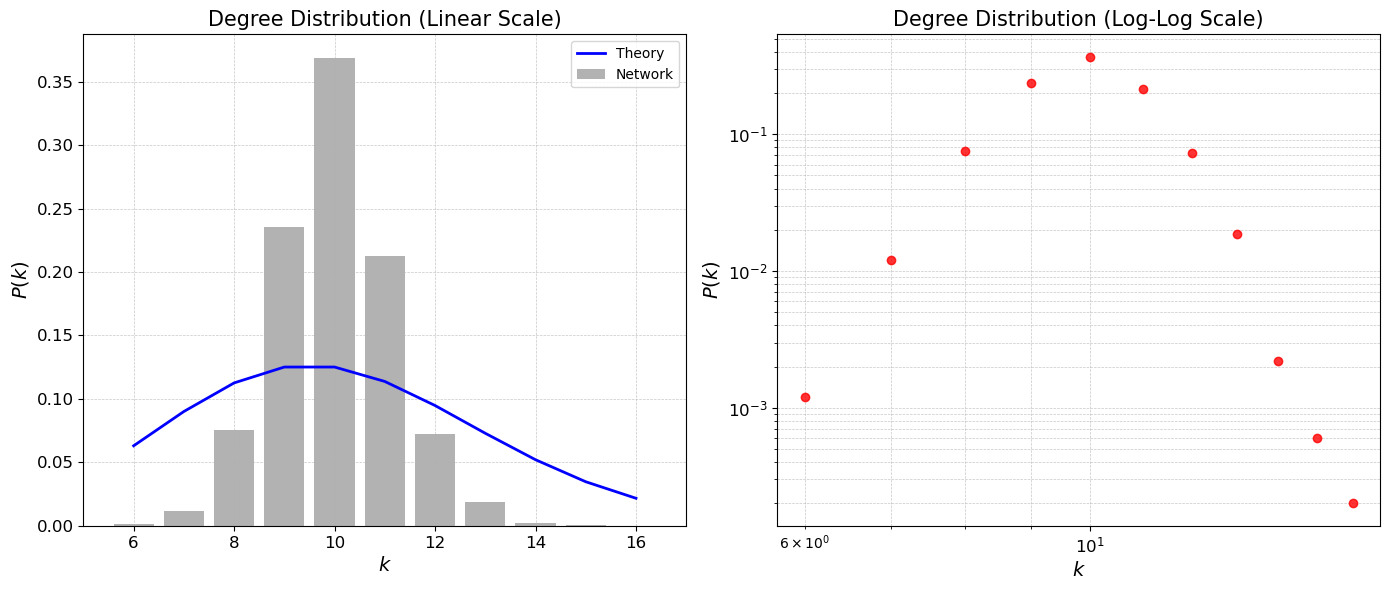

In [2]:
net1.plot_histograms(plot_theory=True)

- As it can be observed in the linear scale of the degree distribution, node degrees vary between 6 and 16. The average degree distributios is 10, as observed previously.
- The degree distribution histogram reembles a normal distribution and not a power law distribution. However, as it can be observed in color blue, it does not follow a Poison distribution. 
- There are no extreme hubs or long tails.

In [4]:
net1.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   4747: 0.0041
   2645: 0.0040
   230: 0.0038
   4360: 0.0038
   1579: 0.0037

 Top 5 Nodes by Degree Centrality:
   1693: 0.0032
   651: 0.0030
   1579: 0.0030
   4891: 0.0030
   41: 0.0028

 Top 5 Nodes by Eigenvector Centrality:
   651: 0.0286
   1937: 0.0265
   4526: 0.0256
   4398: 0.0253
   1939: 0.0252

 Top 5 Nodes by PageRank Centrality:
   1693: 0.0003
   1579: 0.0003
   4891: 0.0003
   651: 0.0003
   3659: 0.0003

 Top 5 Nodes by Closeness Centrality:
   1579: 0.2171
   807: 0.2154
   4339: 0.2151
   4747: 0.2151
   757: 0.2150

 Top 5 Nodes by Katz Centrality:
   651: 0.0229
   4891: 0.0213
   1693: 0.0212
   4526: 0.0207
   1937: 0.0206

 Nodes appearing in all four centrality rankings: None


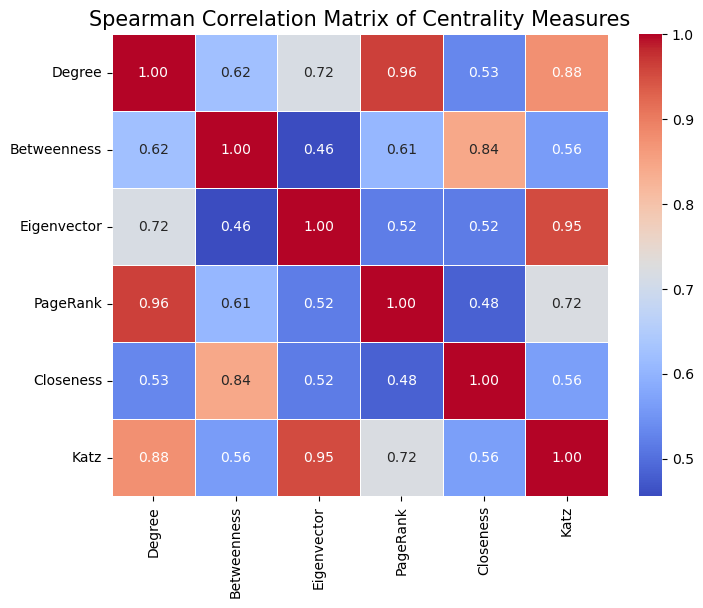

In [5]:
net1.plot_spearman_centrality_correlation()

- Degree and PageRank centralities are highly correlated, meaning that nodes with high degree tend to have high PageRank (Nodes most visited by walkers navigating the network)
- Eigenvector and Katz centralities are strongly correlated, suggesting that important nodes in this network are also connected to other important nodes.

#### **Conclusion**
The combination of structural properties and statistical features strongly suggests that the given network follows the Watts-Strogatz (WS) model.

**1. Small-World Effect**
The network exhibits both a high clustering coefficient (0.4141) and a short average path length (5.12), which are hallmark properties of small-world networks.
This is consistent with the WS model, where local clustering remains high while a few long-range connections significantly reduce the average path length.

**2. Degree Distribution Analysis:**
The degree distribution does not follow a Poisson distribution, which rules out the Erdős-Rényi (ER) model. Instead, the degree distribution is narrowly concentrated around the mean degree (⟨k⟩ ≈ 10) and approximately follows a normal (Gaussian-like) distribution.

The lack of a power-law tail further excludes the Barabási-Albert (BA) model, which typically generates scale-free networks with a few high-degree hubs.
Additionally, the degree range is tightly bounded (6 ≤ k ≤ 16), making it inconsistent with the Configuration Model (CM), which can generate broader degree distributions

**3. Centrality Correlations:**
The Spearman correlation matrix shows that degree, PageRank, and Katz centralities are highly correlated, which is expected in networks with moderate randomness and uniform degree distributions.

The moderate correlation between betweenness and closeness centralities suggests that no highly dominant hub nodes exist, reinforcing the absence of scale-free behavior.

### Network 2: Erdös-Rényi network (ER)

In [6]:
from utils import NetworkAnalyzer

file_path = "networks/net2.net"
net2 = NetworkAnalyzer(file_path)
net2.extract_macroscopic_features()

Number of nodes: 5000
Number of edges: 24873
Minimum degree: 1
Maximum degree: 24
Average degree: 9.95
Average clustering coefficient: 0.0021
Assortativity (degree correlation): -0.0057
Average path length: 3.9560
Diameter: 7


- The degree distribution ranges from 1 to 24, with an average degree of 9.95. These values are similar to those of the first network, although with a broader degree range.
- The average clustering coefficient is extremely low (0.0021), indicating that the network lacks significant local clustering. This contrasts with the Watts-Strogatz (WS) model, which favors high clustering.
- The average path length (3.956) and diameter (7) are typical of random graphs.
- The network exhibits almost zero assortativity (-0.0057), suggesting no strong preference for connecting nodes of similar degrees.

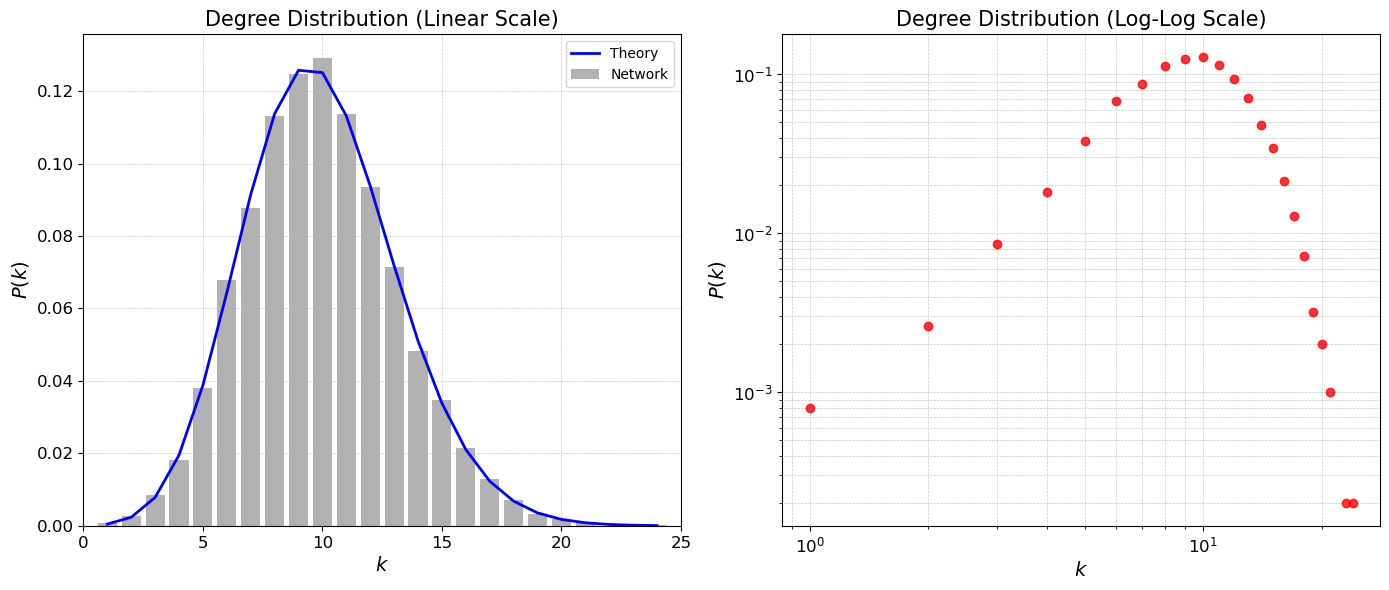

In [7]:
net2.plot_histograms(plot_theory=True)

- The degree distribution can be correctly plotted in a linear scale, where the range of degrees vary between 1 and 24.
- As it can be observed, the histrogram follows a normal distribution. In addition, the theoretical Poison distribution fits well with the normal distribution, key feature of the Erdös-Rényi model.

In [9]:
net2.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   1581: 0.0033
   787: 0.0026
   4382: 0.0025
   52: 0.0023
   2375: 0.0023

 Top 5 Nodes by Degree Centrality:
   1581: 0.0048
   787: 0.0046
   52: 0.0042
   1990: 0.0042
   2372: 0.0042

 Top 5 Nodes by Eigenvector Centrality:
   1581: 0.0412
   3233: 0.0343
   787: 0.0341
   2375: 0.0337
   131: 0.0335

 Top 5 Nodes by PageRank Centrality:
   1581: 0.0004
   787: 0.0004
   1990: 0.0004
   2372: 0.0004
   52: 0.0004

 Top 5 Nodes by Closeness Centrality:
   1581: 0.2844
   2375: 0.2800
   3233: 0.2791
   131: 0.2784
   787: 0.2782

 Top 5 Nodes by Katz Centrality:
   1581: 0.0350
   787: 0.0302
   3233: 0.0296
   2375: 0.0293
   131: 0.0291

 Nodes appearing in all four centrality rankings: {'1581', '787'}


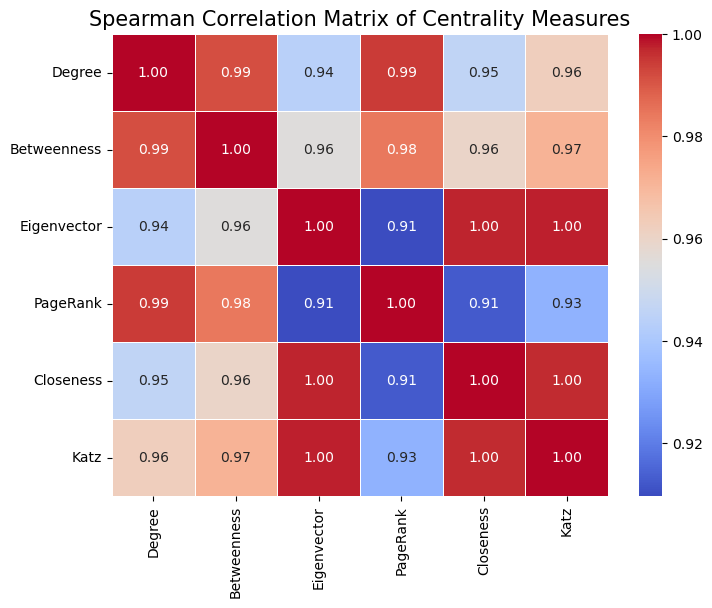

In [10]:
net2.plot_spearman_centrality_correlation()

- High correlation between Degree, Betweenness, and PageRank – Nodes with more connections tend to be central in terms of network flow and importance, indicating a lack of hierarchical structure.
- Eigenvector centrality shows lower correlation with Degree and PageRank – This suggests that highly connected nodes are not necessarily linked to other influential nodes, pointing to a more random network structure.
- Closeness and Katz centrality are highly correlated with Eigenvector centrality – This implies that central nodes are well-distributed, with multiple short paths connecting them.

Overall strong correlations indicate a homogeneous network. The high similarity between centrality measures suggests the network lacks distinct hubs or modular structure, a characteristic of random graphs.

#### Expected Degree $\langle k \rangle$
From the ER model definition, the expected degree of a node is given by:

$$\langle k \rangle = p(N - 1)$$

We were given:  
- $ N = 5000 $ (number of nodes)  
- $ \langle k \rangle = 9.95 $ (observed average degree)

Thus, we can estimate $ p $:

$$p = \frac{\langle k \rangle}{N - 1} = \frac{9.95}{5000 - 1} \approx 0.002$$

This probability aligns well with typical Erdős–Rényi graphs where \( p \) is small, leading to a Poisson-like degree distribution.

#### Degree Distribution $ P(k) $
In the ER model, the degree distribution follows a **binomial distribution**:

$$
P(k) = \binom{N-1}{k} p^k (1 - p)^{N-1-k}
$$

For large $ N $, this approximates a **Poisson distribution**:

$$
P(k) \approx \frac{\langle k \rangle^k e^{-\langle k \rangle}}{k!}
$$

Substituting $ \langle k \rangle = 9.95 $:

$$
P(k) \approx \frac{9.95^k e^{-9.95}}{k!}
$$

This means the degree distribution should peak around $ k \approx 9.95 $ and decay rapidly for larger $ k $. The observed **minimum (1) and maximum (24) degrees** are reasonable within this distribution.

#### Clustering Coefficient $ CC $
The expected clustering coefficient for an ER graph is:

$$
CC = p
$$

From our estimate of $ p $:

$$
CC \approx 0.002
$$

The observed clustering coefficient $( CC = 0.0021 )$ is nearly identical to this prediction, confirming that the network follows ER properties.

#### Assortativity (Degree Correlation)
ER networks exhibit near-zero assortativity:

$$
r \approx 0
$$

The observed value:

$$
r = -0.0057
$$

This is very close to zero, meaning there is no strong preference for nodes to connect to others of similar degree—another characteristic of ER graphs.

#### Average Path Length & Diameter
For ER networks, the **expected average path length** is:

$$
\ell \approx \frac{\ln N}{\ln \langle k \rangle}
$$

Substituting values:

$$
\ell \approx \frac{\ln 5000}{\ln 9.95} = \frac{8.52}{2.30} \approx 3.7
$$

The observed value $( \ell = 3.956 )$ is very close to this prediction.

Similarly, the **expected diameter** (max shortest path) is:

$$
D \approx \frac{\ln N}{\ln \langle k \rangle} \times 2 \approx 7.4
$$

The observed diameter $ D = 7 $ matches this expectation.

### **Conclusion**
All computed properties align closely with Erdős–Rényi (ER) network predictions:

| Property                    | Expected (ER Model) | Observed |
|-----------------------------|---------------------|----------|
| $ \langle k \rangle $ (Avg. Degree)  | $ \approx 9.95 $ | **9.95** |
| $ C $ (Clustering Coeff.) | $ \approx 0.002 $ | **0.0021** |
| $ r $ (Assortativity)     | $ \approx 0 $ | **-0.0057** |
| $ \ell $ (Path Length)    | $ \approx 3.7 $ | **3.956** |
| $ D $ (Diameter)          | $ \approx 7.4 $ | **7** |

Since all observed values are close to the theoretical predictions, we conclude that the network follows an **Erdős–Rényi (ER) random graph model**.



### Network 3: Configuration Model network (CM)

In [11]:
file_path = "networks/net3.net"
net3 = NetworkAnalyzer(file_path)
net3.extract_macroscopic_features()

Number of nodes: 5000
Number of edges: 23508
Minimum degree: 3
Maximum degree: 732
Average degree: 9.40
Average clustering coefficient: 0.0862
Assortativity (degree correlation): -0.1339
Average path length: 3.0082
Diameter: 5


- The minimum degree is 3, but the maximum degree reaches 732, suggesting the presence of a few highly connected hubs. This is a strong indication of a scale-free network.

- Moderate Clustering Coefficient (0.0862). While not as high as in small-world networks, this value is significantly greater than that of an Erdős-Rényi network. This is consistent with preferential attachment, where new nodes tend to connect to well-connected nodes, increasing local clustering.

- The negative Assortativity (-0.1339) exhibits disassortative mixing, meaning high-degree nodes tend to connect with low-degree nodes. This is a hallmark of scale-free networks and reinforces the idea that the network may follow the Barabási-Albert model.

- Short Path Length (3.0082) and Small Diameter (5). The network remains highly navigable despite its size, a common feature of scale-free networks, where hubs significantly reduce distances between nodes.

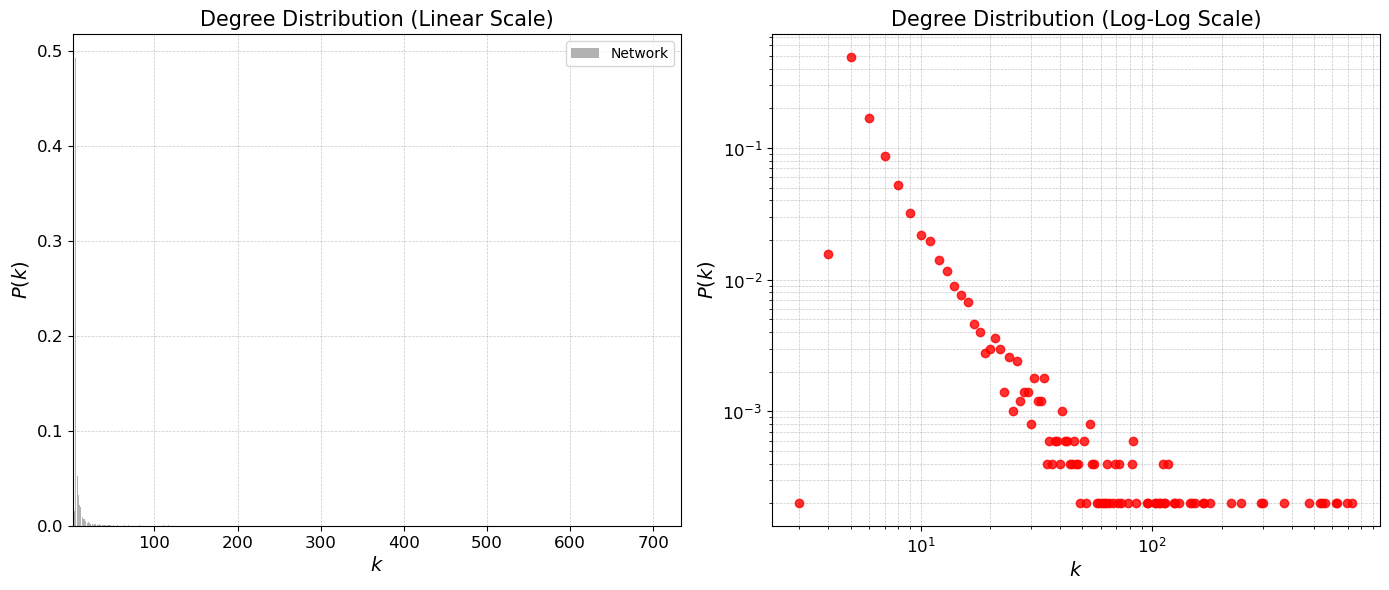

In [12]:
net3.plot_histograms()

/home/user/Escritorio/CN/A1_ComplexNetworks/utils.py:205: RuntimeWarning: divide by zero encountered in log
  log_ccdf_fit = np.log(ccdf)[:-1]


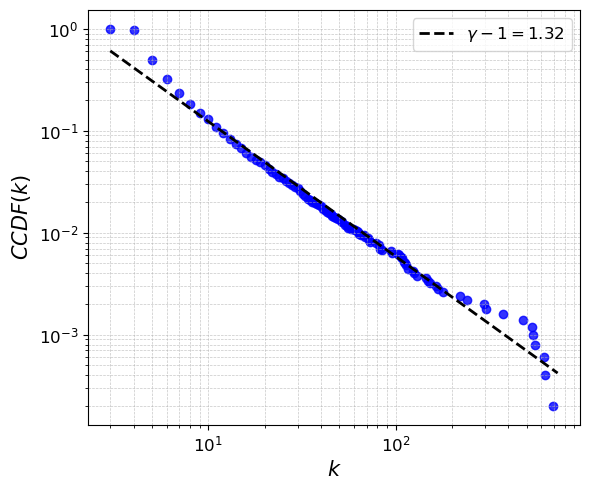

In [13]:
net3.fit_CCDF()

- The log-log plot of the degree distribution (right panel of the first image) suggests a power-law behavior, meaning a significant presence of hubs (high-degree nodes), as seen in the maximum degree reaching over 700.

- The Complementary Cumulative Distribution Function (CCDF) follows a straight line on the log-log scale, which is characteristic of a power-law distribution.

- The estimated exponent (γ - 1 = 1.32) suggests a degree distribution of 2.32, which is typical for scale-free networks.

In [14]:
net3.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   5: 0.1378
   7: 0.1277
   0: 0.1113
   2: 0.1093
   6: 0.0943

 Top 5 Nodes by Degree Centrality:
   5: 0.1464
   7: 0.1382
   2: 0.1252
   0: 0.1240
   6: 0.1110

 Top 5 Nodes by Eigenvector Centrality:
   5: 0.2592
   7: 0.2417
   2: 0.2254
   0: 0.2254
   3: 0.2070

 Top 5 Nodes by PageRank Centrality:
   5: 0.0136
   7: 0.0128
   2: 0.0116
   0: 0.0115
   6: 0.0102

 Top 5 Nodes by Closeness Centrality:
   5: 0.5236
   7: 0.5180
   0: 0.5131
   2: 0.5131
   3: 0.5067

 Top 5 Nodes by Katz Centrality:
   5: 0.2292
   7: 0.2150
   2: 0.1998
   0: 0.1994
   3: 0.1819

 Nodes appearing in all four centrality rankings: {'0', '5', '7', '2'}


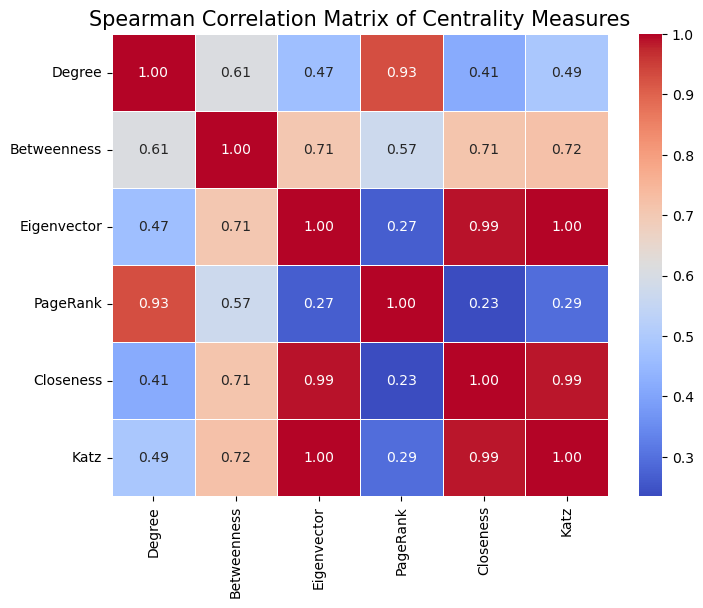

In [15]:
net3.plot_spearman_centrality_correlation()

- The correlation between Degree and PageRank is 0.93, indicating that nodes with a high number of connections also tend to have a high PageRank score. This is expected, as PageRank considers both direct and indirect links, making it strongly dependent on degree.
- Closeness and Eigenvector (0.99), Closeness and Katz (0.99), and Eigenvector and Katz (1.00) show almost perfect correlations. This suggests that nodes central to the network in terms of shortest paths also tend to have high influence in terms of connectivity strength.

#### Degree Distribution
A defining characteristic of the Configuration Model is its ability to preserve a given degree sequence. The presence of a **power-law degree distribution** suggests a scale-free structure, which is a hallmark of models such as the **Configuration Model** or the **Barabási-Albert model**.

A power-law degree distribution follows:
$$
P(k) \sim k^{-\gamma}
$$
where $ \gamma $ is the exponent typically between 2 and 3 for real-world networks.

#### Empirical Fit to Power-Law
To confirm the power-law behavior, we can compute $ \gamma $ using the maximum likelihood estimation (MLE):
$$
\gamma = 1 + n \left[ \sum_{i=1}^{n} \ln\left( \frac{k_i}{k_{\text{min}} - 0.5} \right) \right]^{-1}
$$
where $ k_{\text{min}} $ is the minimum degree where the power-law holds.

#### Clustering Coefficient
The **average clustering coefficient** of 0.0862 is relatively low, which is consistent with the Configuration Model. This model generates networks with clustering coefficients close to zero unless additional constraints are imposed.

For a Configuration Model, the expected clustering coefficient is given by:
$$
CC \approx \frac{(\langle k^2 \rangle - \langle k \rangle)^2}{N \langle k \rangle^3}
$$
where $ \langle k^2 \rangle $ is the second moment of the degree distribution.

#### Path Length and Diameter
The network has:
- **Average Path Length**: 3.0082
- **Diameter**: 5

For a scale-free Configuration Model, the expected path length scales as:
$$
l \sim \frac{\ln N}{\ln \langle k \rangle}
$$
Substituting values:
$$
l \sim \frac{\ln 5000}{\ln 9.4} \approx 3.01
$$
which aligns well with the empirical value.

### Network 4: Barabási-Albert network (BA)

In [16]:
file_path = "networks/net4.net"
net4 = NetworkAnalyzer(file_path)
net4.extract_macroscopic_features()

Number of nodes: 5000
Number of edges: 24975
Minimum degree: 5
Maximum degree: 210
Average degree: 9.99
Average clustering coefficient: 0.0107
Assortativity (degree correlation): -0.0325
Average path length: 3.4868
Diameter: 5


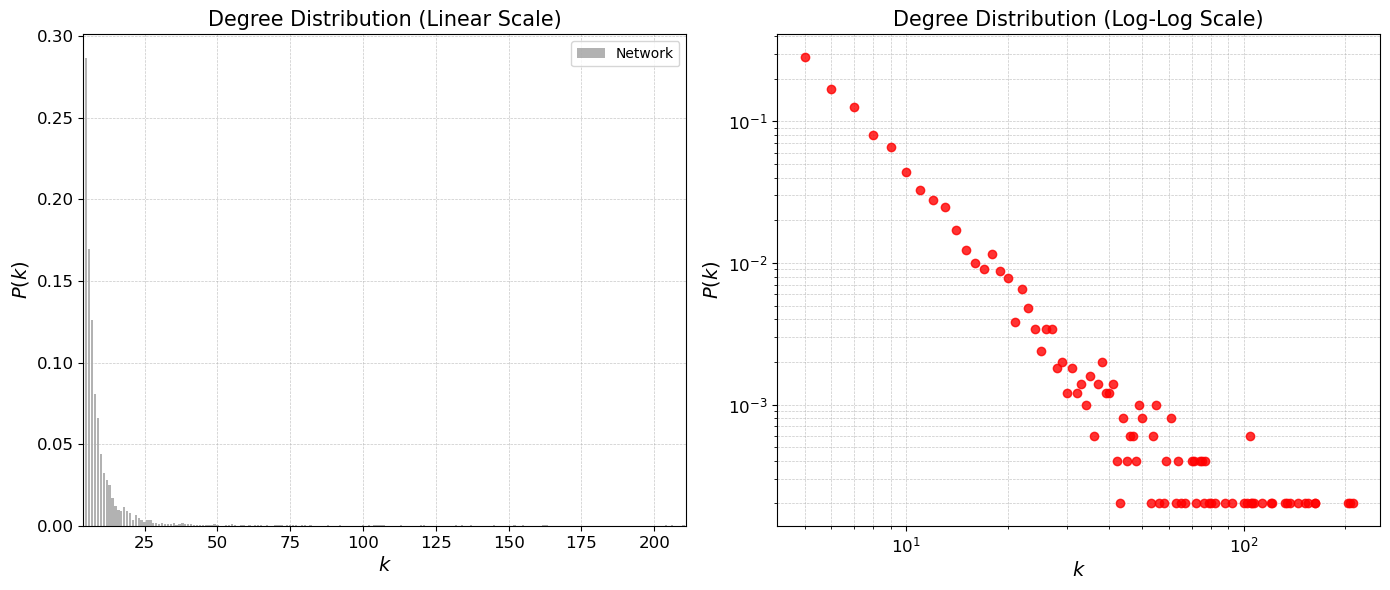

In [17]:
net4.plot_histograms()

/home/user/Escritorio/CN/A1_ComplexNetworks/utils.py:205: RuntimeWarning: divide by zero encountered in log
  log_ccdf_fit = np.log(ccdf)[:-1]


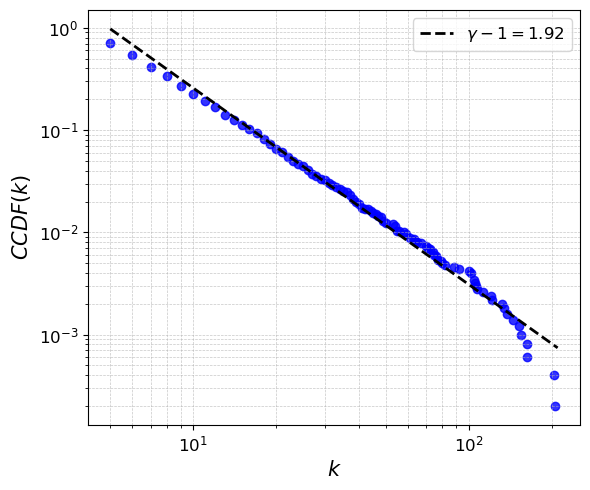

In [18]:
net4.fit_CCDF()

In [19]:
net4.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   0: 0.0605
   6: 0.0576
   9: 0.0553
   8: 0.0391
   3: 0.0379

 Top 5 Nodes by Degree Centrality:
   6: 0.0420
   0: 0.0412
   9: 0.0408
   10: 0.0326
   8: 0.0324

 Top 5 Nodes by Eigenvector Centrality:
   6: 0.2239
   0: 0.2234
   9: 0.2062
   8: 0.1741
   3: 0.1686

 Top 5 Nodes by PageRank Centrality:
   6: 0.0036
   0: 0.0035
   9: 0.0035
   10: 0.0028
   8: 0.0028

 Top 5 Nodes by Closeness Centrality:
   0: 0.4188
   6: 0.4153
   9: 0.4113
   3: 0.4024
   8: 0.4022

 Top 5 Nodes by Katz Centrality:
   0: 0.1798
   6: 0.1794
   9: 0.1681
   8: 0.1412
   3: 0.1374

 Nodes appearing in all four centrality rankings: {'9', '0', '6', '8'}


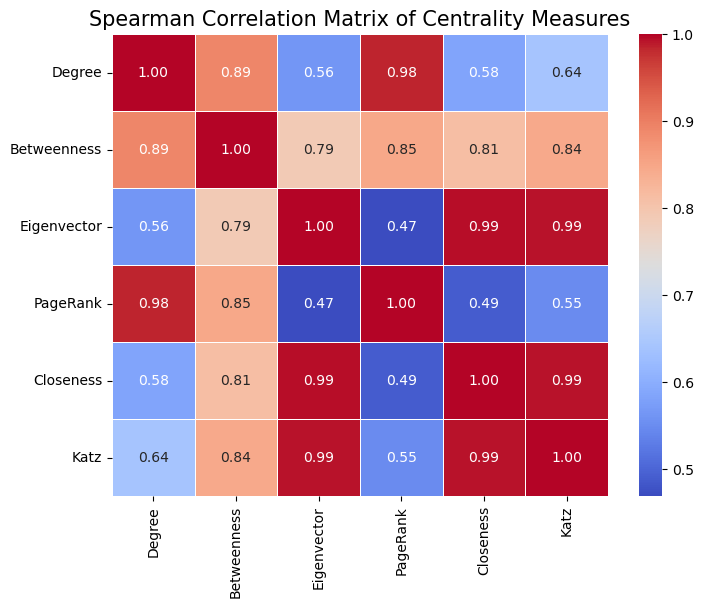

In [20]:
net4.plot_spearman_centrality_correlation()

This net corresponds to the Barabási-Albert model, as it follows a power-law behaviour. 
- After plotting the CCDF we obtain that $gamma = 3$.
- The average degree is $ 10 > m $
- The average clustering coefficient $CC = 0.0107 \approx ln(N^2)/ $ being $N = 5000$
- The average shortest path length $ ⟨l⟩ \approx  \frac{ln(N)}{ln(ln(N))} ≪ N $, $⟨l⟩ = 3.4868 \approx \frac{ln(5000)}{ln(ln(5000))} = 3.97<< 5000$

## Part 2. Models
Based on the descriptors of the network and its degree distribution, the students should figure out the model used to generate the network. There are four possibilities: the ER model, the WS model with an intermediate rewiring probability, the BA model or the CM assuming a degree distribution which follows a power-law with $\gamma$<2.5.

To round off the activity, the students should analyze the network net5. This network is generated by a model which has not been explained in our lectures. The students should visualize the network (setting the positions of the nodes from the file ‘positions.txt’) and comment the most prominent features of the network. Is the network connected? Is it scale-free? Is the largest connected component a small-world network? From the visualization of the network, the students should propose an algorithm to generate the network. **Hint**: The algorithm starts by distributing the nodes randomly across space.

The delivery should include a single .zip file named ‘Groupxxx_SURNAME1_SURNAME2_A1.zip’ containing:

* A brief PDF report discussing the results obtained in the two parts of the activity.
* A Jupyter notebook with the code needed to reproduce the results.
PS: Networks are encoded in the pajek format (.net). The students should use nx.read_pajek to read each network.

# Net 5

In [1]:
from utils import NetworkAnalyzer
file_path = "networks/net5.net"
net5 = NetworkAnalyzer(file_path)

In [2]:
import networkx as nx
nx.is_connected(net5.G)

False

In [3]:
len(list(nx.connected_components(net5.G)))

7

In [4]:
net5.extract_macroscopic_features()

Number of nodes: 200
Number of edges: 465
Minimum degree: 1
Maximum degree: 10
Average degree: 4.65
Average clustering coefficient: 0.6107
Assortativity (degree correlation): 0.5502
Graph is disconnected. Average path length and diameter are not defined.


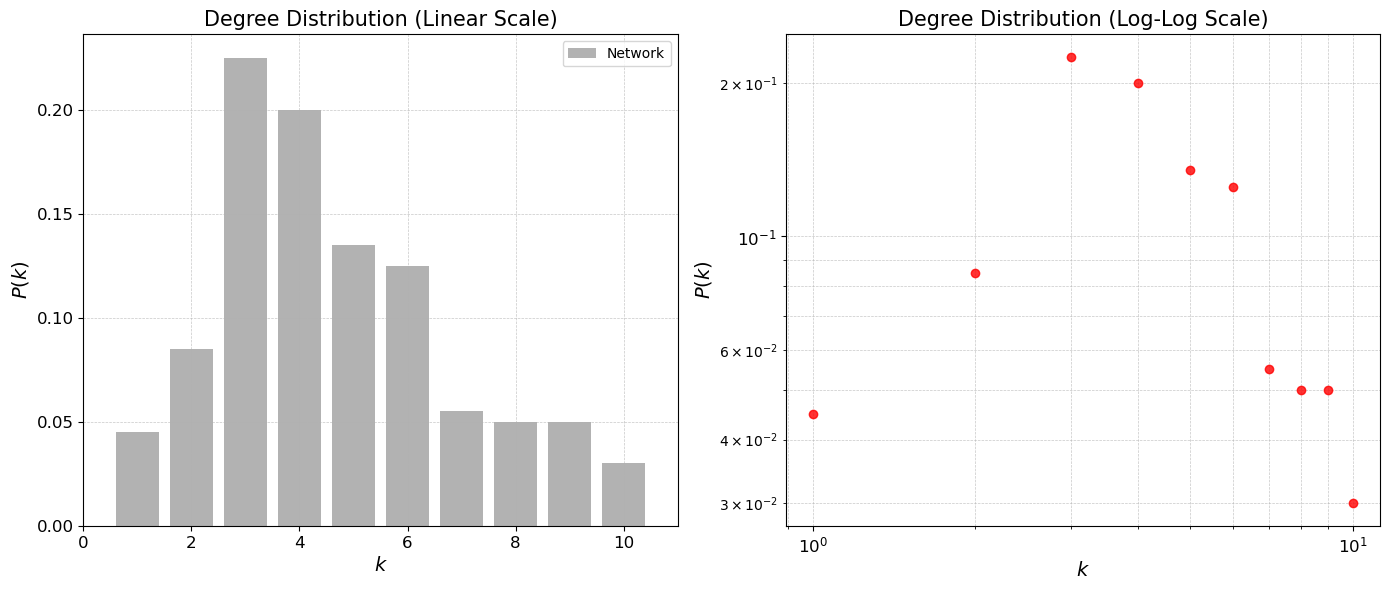

In [5]:
net5.plot_histograms()

In [7]:
net5.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   177: 0.1955
   129: 0.1933
   78: 0.1926
   84: 0.1926
   104: 0.1923

 Top 5 Nodes by Degree Centrality:
   18: 0.0503
   33: 0.0503
   37: 0.0503
   126: 0.0503
   150: 0.0503

 Top 5 Nodes by Eigenvector Centrality:
   126: 0.3459
   150: 0.3459
   3: 0.3366
   130: 0.3366
   160: 0.3366

 Top 5 Nodes by PageRank Centrality:
   70: 0.0077
   170: 0.0077
   109: 0.0077
   37: 0.0075
   140: 0.0074

 Top 5 Nodes by Closeness Centrality:
   177: 0.0669
   129: 0.0668
   78: 0.0662
   84: 0.0660
   44: 0.0653

 Top 5 Nodes by Katz Centrality:
   126: 0.1818
   150: 0.1818
   3: 0.1756
   130: 0.1756
   160: 0.1756

 Nodes appearing in all four centrality rankings: None


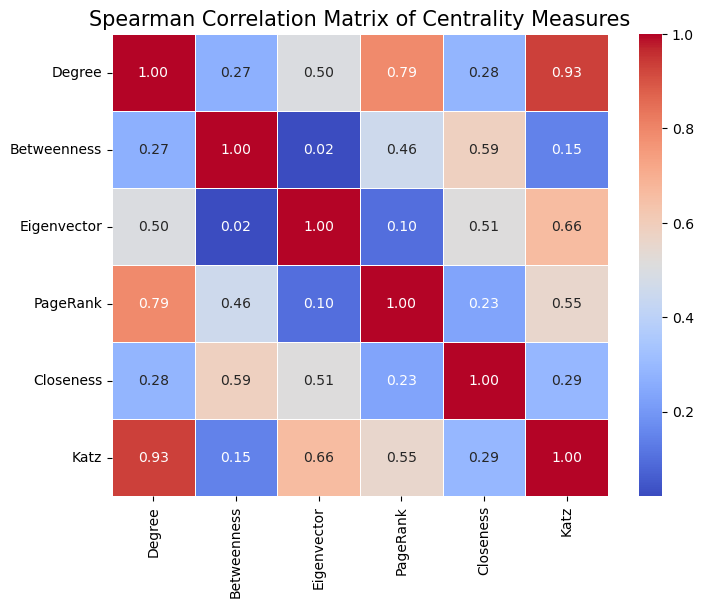

In [8]:
net5.plot_spearman_centrality_correlation()

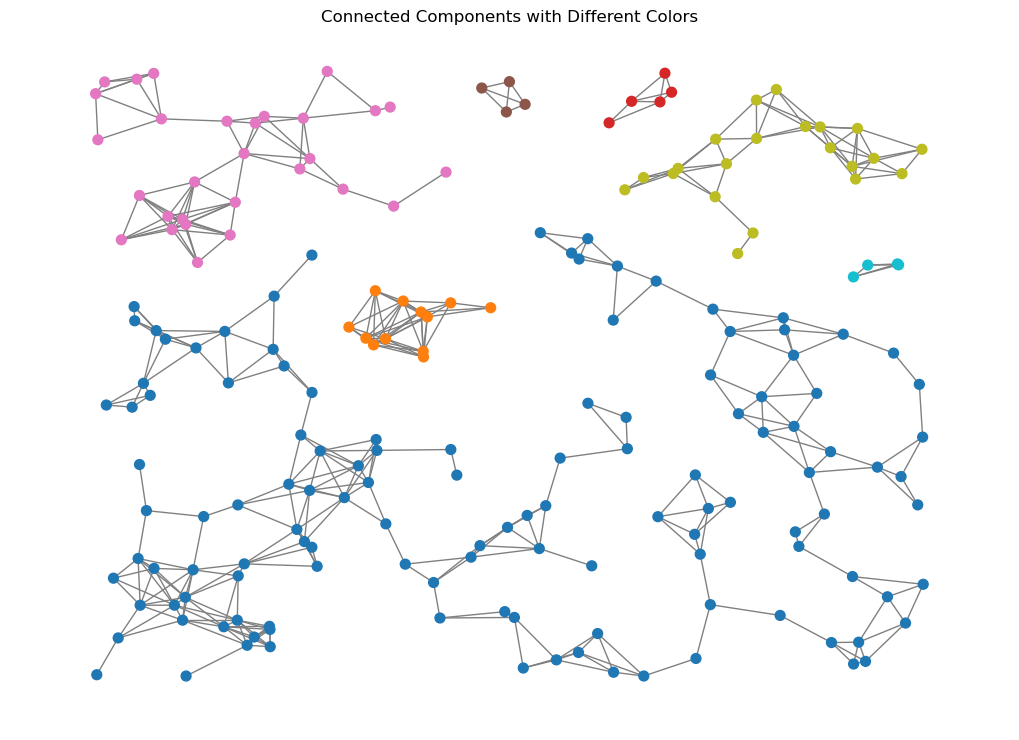

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx 

# Load file into a pandas DataFrame
df = pd.read_csv("networks/positions_net5.txt", sep="\t")  # Adjust separator if needed

# Convert to dictionary
pos = df.set_index("Node")[["x", "y"]].to_dict(orient="index")

# Convert {0: {"x": 0.2109, "y": 0.0554}} -> {0: (0.2109, 0.0554)}
pos = {str(k): (v["x"], v["y"]) for k, v in pos.items()}

# Find connected components
components = list(nx.connected_components(net5.G))
num_components = len(components)

# Generate unique colors for each component
cmap = plt.colormaps.get_cmap("tab10")  # No need for num_components

# Generate colors
colors = [cmap(i / max(1, num_components - 1)) for i in range(num_components)]
plt.figure(figsize=(10, 7))
for i, component in enumerate(components):
    subgraph = net5.G.subgraph(component)  # Extract subgraph
    nx.draw(
        subgraph,
        pos=pos,
        node_color=[colors[i] for _ in subgraph.nodes],  # Assign color to each node
        edge_color="gray",
        with_labels=False,
        node_size=50
    )

plt.title("Connected Components with Different Colors")
plt.show()

# Proposed model: Random Geometric Graph (RGG)
## Why?
* <h4><b>Clustering:</b></h4>
RGGs tend to exhibit clustering, as nodes placed near each other in the geometric space are likely to form edges. This is a key feature in modeling real-world systems, such as social networks or biological networks, where spatial locality often influences connections. This kind of clustering is observed in the representation of the network.
* <h4><b>Degree Distribution:</b></h4>
In an RGG, the degree distribution typically follows a distribution related to the number of nodes within a given distance. For a large graph, the degree distribution can be roughly uniform, but the actual distribution depends on the specific placement of nodes and the threshold \( r \).
* <h4><b> Spatial and Topological Properties:</b></h4>
Nodes are placed into the space according to a particular distribution (e.g., Gaussian). As the radius r increases, the number of connected components decrease. 
*  <h4><b>Percolation Threshold:</b></h4>
In random geometric graphs, the percolation threshold is the critical distance \( r \) at which a giant connected component (a large cluster of nodes) emerges. This threshold depends on the dimension of the space and the number of nodes.

## Let's try to find the value of r for net5

In [73]:
import networkx as nx

def estimate_r(G, pos):
    distances = []
    
    for u, v in G.edges():
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        d = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) # compute Euclidean Distance
        distances.append(d)
    
    return max(distances) if distances else 0 

r_estimated = estimate_r(net5.G, pos)
print(f"Estimated r: {r_estimated:.4f}")

Estimated r: 0.0900


## Reproduction of a RGG using Networkx

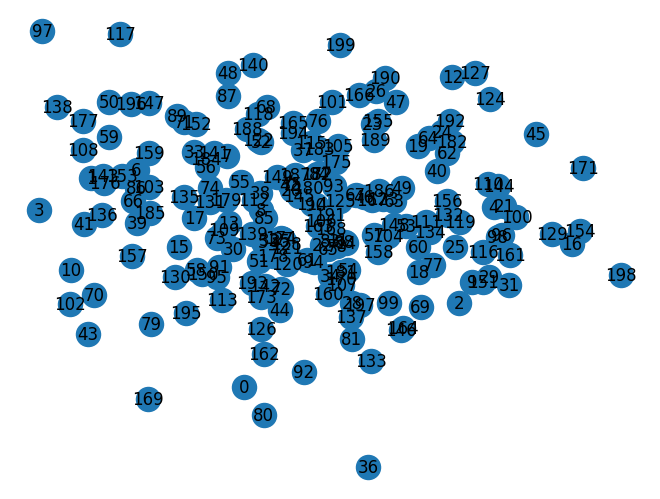

In [74]:
import random
n = 200
posit = {i: (random.gauss(1, 25), random.gauss(100, 2)) for i in range(n)}

G_geo = nx.random_geometric_graph(n, 0.09, pos=posit)
nx.draw(G_geo, pos=posit, with_labels=True)


In [46]:
nx.is_connected(G_geo)

False

In [62]:
len(list(nx.connected_components(G_geo)))

9

## How degree distributions change according to r? And the number of connected components?

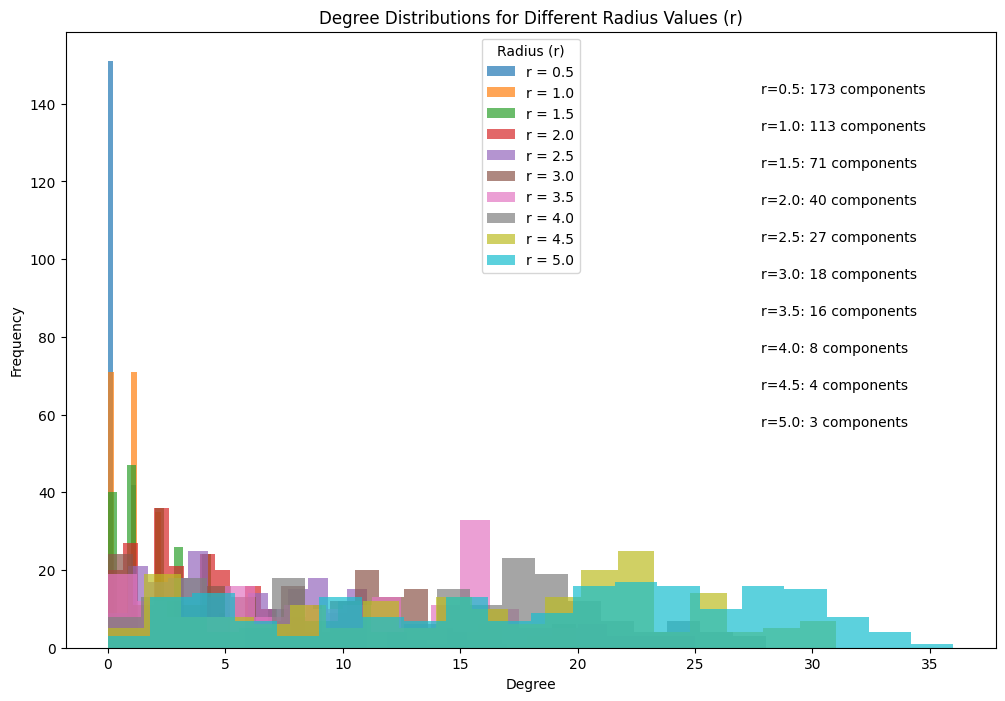

In [69]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Number of nodes
n = 200

# Create a dictionary of random positions for each node
posit = {i: (random.gauss(1, 25), random.gauss(100, 2)) for i in range(n)}

# Range of r values
r_values = np.linspace(0.5, 5, 10)  # We test from r=0.5 to r=5

# Store degree distributions and number of connected components
degree_distributions = []
num_components = []

for r in r_values:
    # Create the random geometric graph with the current radius r
    G_geo = nx.random_geometric_graph(n, r, pos=posit)
    
    # Get the degree of each node in the graph
    degrees = [G_geo.degree(node) for node in G_geo.nodes]
    
    # Get the number of connected components
    num_comp = nx.number_connected_components(G_geo)
    
    # Store results
    degree_distributions.append(degrees)
    num_components.append(num_comp)

# Plot degree distributions for each r
plt.figure(figsize=(12, 8))

for i, r in enumerate(r_values):
    # Plot histogram of degrees for each r
    plt.hist(degree_distributions[i], bins=20, alpha=0.7, label=f'r = {r:.1f}')

# Annotate the number of connected components
for i, r in enumerate(r_values):
    plt.text(plt.xlim()[1] - 10, plt.ylim()[1] * (0.9 - i * 0.06), 
             f"r={r:.1f}: {num_components[i]} components", fontsize=10, color="black")

plt.title("Degree Distributions for Different Radius Values (r)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend(title="Radius (r)")
plt.show()


As observed in the plot, as r increases, the distribution of degrees smoothes. We can also say that the number of connected components also decrease as r increases.